(lecture04:plotting-noisy-measurements)=
# Plotting noisy measurements

Let's continue on the previous example with the dumped harmonic oscillator by making things a bit more realistic.
Now assume that we have a small error in the measurement of the position.
So, we assume that our measurement $y_i$ at timestep $t_i$ is not exactly given by the function $f(t_i) = e^{-0.1t_i}\left[\cos(\pi t_i) + 0.5\sin(\pi t_i)\right]$, but by:

$$
y_i = f(t_i) + \text{noise}.
$$

This is a model of the *measurement process*.
It is one of the fundamental blocks in data science problems.
We do not know enough to understand the nature of the noise.
Instead, I am going to just make some noise for you and tell you how you can make it bigger or smaller.
Then, we are going to simulate the measurement process and generate some data to plot.

Start by importing some basic libraries.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np

These are the times on which I will have measurements:

In [2]:
ts = np.linspace(0, 4 * np.pi, 100)
ts

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

Get the true (but unobserved) oscillator position:

In [3]:
fs = np.exp(-0.1 * ts) * (np.cos(np.pi * ts) + 0.5 * np.cos(np.pi * ts))

And let's make the some noise!

This is the variable that controls the noise.
It is called "standard deviation."
We will explain what it is in a few lectures.
For now, this is what you need to know:
- Smaller standard deviation, means less noise.
- Bigger standard deivation, means more noie.
- The smallest standard deviation you can have is zero (no noise).

In [4]:
sigma = 0.1

And now we are going to make some random numbers centered at zero, and we are going to multiply them with ``sigma`` and add them to ``fs``:

In [5]:
ys = fs + sigma * np.random.randn(fs.shape[0])
ys

array([ 1.56973355,  1.36883717,  0.9781098 ,  0.44663113, -0.05728611,
       -0.59942684, -1.03941339, -1.40012097, -1.23195924, -1.34212573,
       -0.85960661, -0.43792201,  0.12108928,  0.65846996,  1.0428189 ,
        1.12905815,  1.09954211,  1.13637876,  0.57997425,  0.30727974,
       -0.12185871, -0.64338427, -1.03608775, -1.20521753, -1.10805339,
       -1.01655788, -0.61122002, -0.11188226,  0.16986948,  0.40607295,
        0.76543685,  0.88804251,  0.91099358,  0.78897458,  0.65022897,
        0.23795338, -0.33168056, -0.57382496, -0.8087279 , -1.05312185,
       -0.76679741, -0.74115966, -0.4456702 ,  0.09277946,  0.03023698,
        0.54138368,  0.5820714 ,  0.77258375,  0.64617286,  0.69570863,
        0.37914282,  0.13689345, -0.31098637, -0.59876778, -0.74369654,
       -0.75611362, -0.50016996, -0.56391642, -0.34302369, -0.08051999,
        0.10209056,  0.49143289,  0.7692702 ,  0.65642031,  0.44075706,
        0.5148094 ,  0.09448634, -0.03307068, -0.25133974, -0.35

We now have the noisy position measurements ``ys``.
Let's plot them against the true (but, I repeat, **unobserved**) oscillator positions:

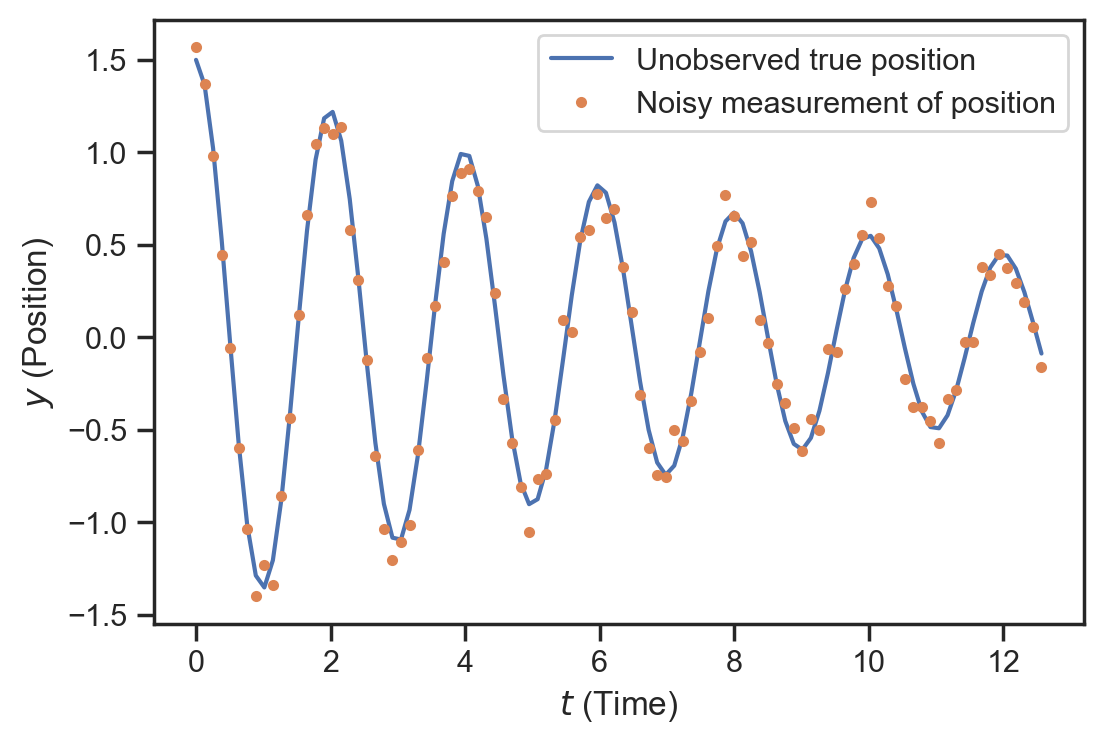

In [6]:
fig, ax = plt.subplots()
ax.plot(ts, fs, label='Unobserved true position')
ax.plot(ts, ys, '.', label='Noisy measurement of position')
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$y$ (Position)')
plt.legend(loc='best');

Typically, we do not observe the velocity of the oscillator. We can, however, reconstruct the velocity from the position measurements.
This is done by estimating the derivative via finite differences, i.e., by:

$$
v(t) \approx \frac{y(t+\delta t) - y(t)}{\delta t},
$$

for $\delta t$ being the time that passes between two consecutive timesteps.
The Numpy library has a function for reconstructing the velocity in this way.
It is called [numpy.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html).
Let's use it to reconstruct the velocity.
We have to use the noisy position data:

In [7]:
dt = ts[1] - ts[0]
vs = np.gradient(ys, dt)
vs

array([-1.58269575, -2.33045615, -3.63264785, -4.07851233, -4.1205111 ,
       -3.8686827 , -3.15400212, -0.75845441,  0.2284482 ,  1.46672859,
        3.56173514,  3.86304429,  4.318781  ,  3.63077118,  1.85368681,
        0.22343753,  0.02883651, -2.04662187, -3.26589141, -2.76457956,
       -3.74474619, -3.60122575, -2.21310886, -0.28347876,  0.74314634,
        1.95706877,  3.56359404,  3.07677782,  2.04026953,  2.34599038,
        1.89851899,  0.57336033, -0.390237  , -1.02717392, -2.17051926,
       -3.86782494, -3.19766372, -1.87912997, -1.88799112,  0.16516777,
        1.22884551,  1.26494734,  3.28495697,  1.87463873,  1.76709006,
        2.17372263,  0.91071671,  0.25250108, -0.30281761, -1.05185397,
       -2.20122041, -2.71847747, -2.897832  , -1.70448204, -0.61979863,
        0.95927185,  0.75708108,  0.61901247,  1.90413956,  1.75334279,
        2.25297091,  2.62807722,  0.64989945, -1.29404113, -0.55781741,
       -1.36398974, -2.15814612, -1.36223826, -1.26205991, -0.95

Let's plot these data against the true (but unobserved) velocity:

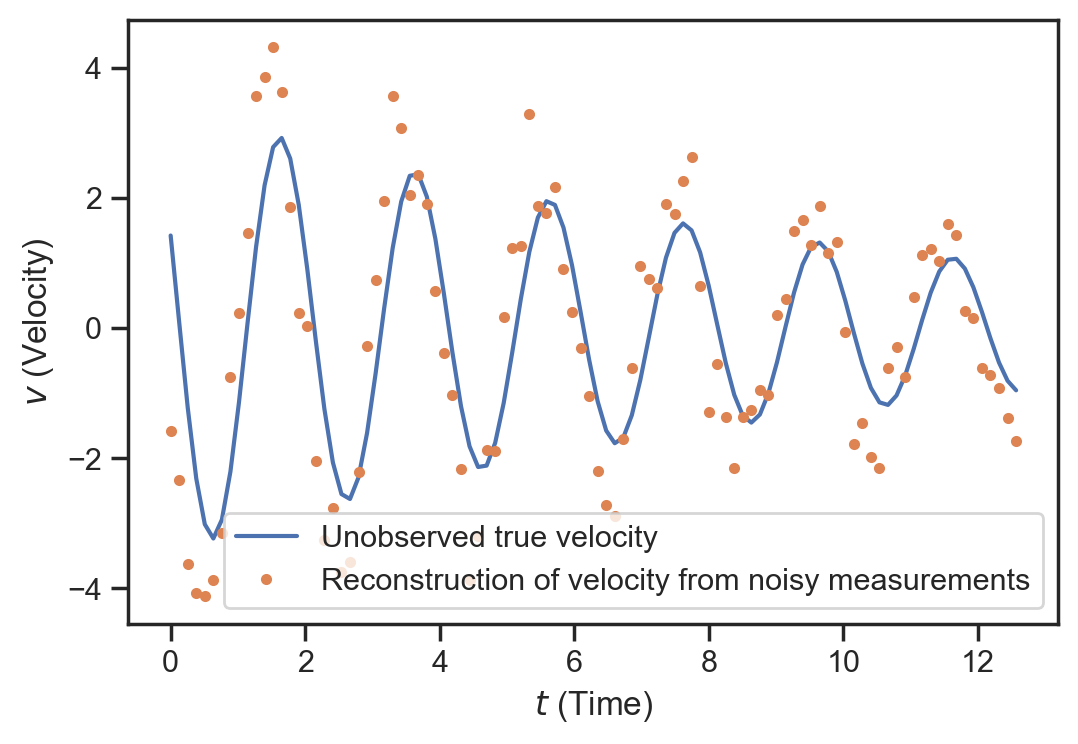

In [8]:
vs_true = -0.1 * fs + np.exp(-0.1 * ts) * (-np.pi * np.sin(np.pi * ts) + 0.5 * np.pi * np.cos(np.pi * ts))
fig, ax = plt.subplots()
ax.plot(ts, vs_true, label='Unobserved true velocity')
ax.plot(ts, vs, '.', label='Reconstruction of velocity from noisy measurements')
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$v$ (Velocity)')
plt.legend(loc='best');

Observe that the noise of the velocity is bigger than for the position.
With the things that we learn in this class it is actually possible to predict how much uncertainty there is going to be in the estimate of the velocity.
Using state-of-the-art data science, it is also possible to construct a much more accurate estimate the velocity than the naïve method we used above.
However, these so-called filtering problems are outside of the scope of this course.

## Questions

+ Rerun the code above with smaller ``sigma`` so that that the velocity reconstruction becomes very accurate. How low should you go?